In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('./data/mnist/mnist_train.csv').iloc[:60000]
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape


(60000, 785)

In [4]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

<Axes: >

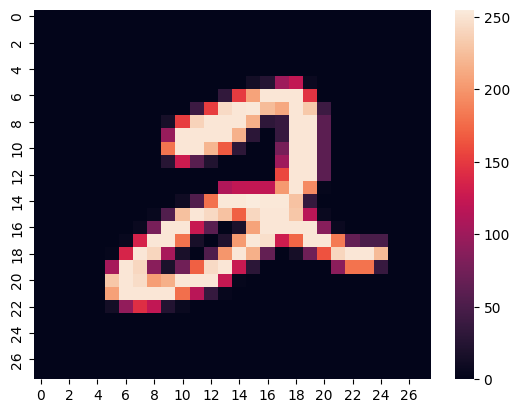

In [5]:
sns.heatmap(x.iloc[5].values.reshape(28,28))

In [6]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x,y)

RandomForestClassifier()

In [7]:
rf.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.49121891e-07, 3.60957405e-07, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.67428413e-07, 2.15748071e-06,
       6.80608429e-07, 6.30865201e-07, 2.93045511e-06, 2.98900429e-06,
       1.45703283e-06, 2.13478445e-06, 5.87166017e-06, 2.28917946e-06,
       1.65419437e-06, 1.91502161e-06, 0.00000000e+00, 5.32601536e-07,
       1.03246305e-06, 0.00000000e+00, 1.02079912e-06, 6.78785524e-07,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [8]:
rf.feature_importances_.shape

(784,)

<Axes: >

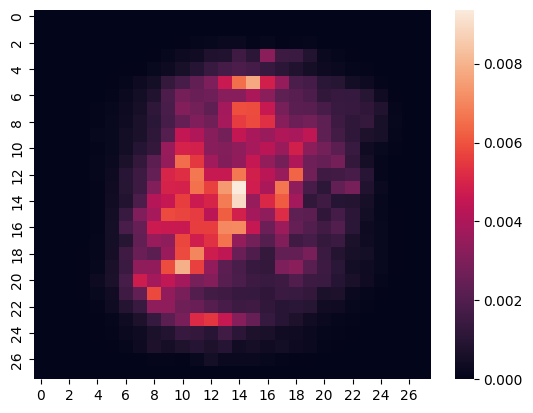

In [9]:
sns.heatmap(rf.feature_importances_.reshape(28,28))

In [10]:
df1 = pd.read_csv('./data/mnist/mnist_test.csv')
df1.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
x_test = df.iloc[:,1:]
y_test = df.iloc[:,0]

In [12]:
y_pred = rf.predict(x_test)

In [15]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2,3,4,5,6,7,8,9
0,5923,0,0,0,0,0,0,0,0,0
1,0,6742,0,0,0,0,0,0,0,0
2,0,0,5958,0,0,0,0,0,0,0
3,0,0,0,6131,0,0,0,0,0,0
4,0,0,0,0,5842,0,0,0,0,0
5,0,0,0,0,0,5421,0,0,0,0
6,0,0,0,0,0,0,5918,0,0,0
7,0,0,0,0,0,0,0,6265,0,0
8,0,0,0,0,0,0,0,0,5851,0
9,0,0,0,0,0,0,0,0,0,5949


---100% accuracy on mnist.. tf